rescaling intensity to [0,1[
RandomTranslation RandomRotation RandomZoom RandomHeight RandomWidth RandomContrast

University of Tsukuba, National Institute for Japanese Language and Linguistics, Lago Institute of Language: NINJAL-LWP for TWC (https://tsukubawebcorpus.jp)

In [77]:
import os
import unicodedata
import pandas as pd
import matplotlib.pyplot as plt

# Adathalmaz megismerése
## Karakterkategóriák
**Hiragana:** 0x3040-0x309F

**Katakana:** 0x30A0-0x30FF

**CJK Unified Ideographs:** 0x4E00-0x9FFF

In [78]:
home = os.environ['HOME']
chars = os.listdir(home + "/Storage/Datasets/ETL/ETL2")
categories = {
    "hiragana": [0x3040, 0x309f, 0],
    "katakana": [0x30a0, 0x30ff, 0],
    "kanji": [0x4e00, 0x9fff, 0]
}
other = 0
other_list = []
for char in chars:
    for type, data in categories.items():
        if data[0] <= int(char, 16) <= data[1]:
            data[2] += 1
            break
    else:
        other += 1
        other_list.append(char)
            
for type, data in categories.items():
    print(f"{type}: {data[2]}")
print(f"other: {other}")

hiragana: 71
katakana: 72
kanji: 1979
other: 51


In [79]:
for char in other_list:
    try:
        print(f"{chr(int(char, 16))}({char}) {unicodedata.name(chr(int(char, 16)))}")
    except ValueError:
        print(f"{chr(int(char, 16))}({char}) UNCATEGORIZED")

E(0x0045) LATIN CAPITAL LETTER E
W(0x0057) LATIN CAPITAL LETTER W
?(0x003f) QUESTION MARK
T(0x0054) LATIN CAPITAL LETTER T
）(0xff09) FULLWIDTH RIGHT PARENTHESIS
P(0x0050) LATIN CAPITAL LETTER P
Y(0x0059) LATIN CAPITAL LETTER Y
Q(0x0051) LATIN CAPITAL LETTER Q
H(0x0048) LATIN CAPITAL LETTER H
。(0x3002) IDEOGRAPHIC FULL STOP
〇(0x3007) IDEOGRAPHIC NUMBER ZERO
C(0x0043) LATIN CAPITAL LETTER C
『(0x300e) LEFT WHITE CORNER BRACKET
N(0x004e) LATIN CAPITAL LETTER N
8(0x0038) DIGIT EIGHT
1(0x0031) DIGIT ONE
7(0x0037) DIGIT SEVEN
S(0x0053) LATIN CAPITAL LETTER S
』(0x300f) RIGHT WHITE CORNER BRACKET
M(0x004d) LATIN CAPITAL LETTER M
O(0x004f) LATIN CAPITAL LETTER O
4(0x0034) DIGIT FOUR
G(0x0047) LATIN CAPITAL LETTER G
U(0x0055) LATIN CAPITAL LETTER U
B(0x0042) LATIN CAPITAL LETTER B
!(0x0021) EXCLAMATION MARK
6(0x0036) DIGIT SIX
X(0x0058) LATIN CAPITAL LETTER X
D(0x0044) LATIN CAPITAL LETTER D
A(0x0041) LATIN CAPITAL LETTER A
K(0x004b) LATIN CAPITAL LETTER K
J(0x004a) LATIN CAPITAL LETTER J
×(0x00d

# Tanítóadatok generálása
**Kitételek:** 
 - Minimum 500 megjelenés minden kanjinak
 - "Természetes-jellegű" környezetben
 - A kanji és nem-kanji karakterek eloszlása legyen reális
 - Kanjik közti arányosság?
    - A kanjik 20%-a teszi ki a megjelenések 80%-át
    - Rétegzett mintavétel?
         - Túl költséges
         - Primitívebb megvalósítás is elég

In [80]:
chars_hex = [hex(int(char_id, 16)) for char_id in chars]
chars_hex.sort(key=lambda h: int(h, 16))
chars_hex

['0x21',
 '0x25',
 '0x30',
 '0x31',
 '0x32',
 '0x33',
 '0x34',
 '0x35',
 '0x36',
 '0x37',
 '0x38',
 '0x39',
 '0x3f',
 '0x41',
 '0x42',
 '0x43',
 '0x44',
 '0x45',
 '0x46',
 '0x47',
 '0x48',
 '0x49',
 '0x4a',
 '0x4b',
 '0x4c',
 '0x4d',
 '0x4e',
 '0x4f',
 '0x50',
 '0x51',
 '0x52',
 '0x53',
 '0x54',
 '0x55',
 '0x56',
 '0x57',
 '0x58',
 '0x59',
 '0x5a',
 '0x7c',
 '0xd7',
 '0x2016',
 '0x3001',
 '0x3002',
 '0x3007',
 '0x300e',
 '0x300f',
 '0x3010',
 '0x3011',
 '0x3042',
 '0x3044',
 '0x3046',
 '0x3048',
 '0x304a',
 '0x304b',
 '0x304c',
 '0x304d',
 '0x304e',
 '0x304f',
 '0x3050',
 '0x3051',
 '0x3052',
 '0x3053',
 '0x3054',
 '0x3055',
 '0x3056',
 '0x3057',
 '0x3058',
 '0x3059',
 '0x305a',
 '0x305b',
 '0x305c',
 '0x305d',
 '0x305e',
 '0x305f',
 '0x3060',
 '0x3061',
 '0x3062',
 '0x3064',
 '0x3065',
 '0x3066',
 '0x3067',
 '0x3068',
 '0x3069',
 '0x306a',
 '0x306b',
 '0x306c',
 '0x306d',
 '0x306e',
 '0x306f',
 '0x3070',
 '0x3071',
 '0x3072',
 '0x3073',
 '0x3074',
 '0x3075',
 '0x3076',
 '0x3077',
 '0x

In [81]:
zeros = [0 for _ in range(len(chars_hex))]

In [82]:
# occurrences = pd.DataFrame(zeros, columns=['count'], index=chars_hex)
# occurrences
occurrences = dict(map(lambda i,j : (i,j) , chars_hex,zeros))
occurrences

{'0x21': 0,
 '0x25': 0,
 '0x30': 0,
 '0x31': 0,
 '0x32': 0,
 '0x33': 0,
 '0x34': 0,
 '0x35': 0,
 '0x36': 0,
 '0x37': 0,
 '0x38': 0,
 '0x39': 0,
 '0x3f': 0,
 '0x41': 0,
 '0x42': 0,
 '0x43': 0,
 '0x44': 0,
 '0x45': 0,
 '0x46': 0,
 '0x47': 0,
 '0x48': 0,
 '0x49': 0,
 '0x4a': 0,
 '0x4b': 0,
 '0x4c': 0,
 '0x4d': 0,
 '0x4e': 0,
 '0x4f': 0,
 '0x50': 0,
 '0x51': 0,
 '0x52': 0,
 '0x53': 0,
 '0x54': 0,
 '0x55': 0,
 '0x56': 0,
 '0x57': 0,
 '0x58': 0,
 '0x59': 0,
 '0x5a': 0,
 '0x7c': 0,
 '0xd7': 0,
 '0x2016': 0,
 '0x3001': 0,
 '0x3002': 0,
 '0x3007': 0,
 '0x300e': 0,
 '0x300f': 0,
 '0x3010': 0,
 '0x3011': 0,
 '0x3042': 0,
 '0x3044': 0,
 '0x3046': 0,
 '0x3048': 0,
 '0x304a': 0,
 '0x304b': 0,
 '0x304c': 0,
 '0x304d': 0,
 '0x304e': 0,
 '0x304f': 0,
 '0x3050': 0,
 '0x3051': 0,
 '0x3052': 0,
 '0x3053': 0,
 '0x3054': 0,
 '0x3055': 0,
 '0x3056': 0,
 '0x3057': 0,
 '0x3058': 0,
 '0x3059': 0,
 '0x305a': 0,
 '0x305b': 0,
 '0x305c': 0,
 '0x305d': 0,
 '0x305e': 0,
 '0x305f': 0,
 '0x3060': 0,
 '0x3061': 0,
 '0x

In [83]:
def is_hiragana(letter: str):
    if 0x3040 <= ord(letter) <= 0x309f:
        return True
    else: 
        return False

In [84]:
def is_katakana(letter: str):
    if 0x30a0 <= ord(letter) <= 0x30ff:
        return True
    else: 
        return False

In [85]:
def is_kanji(hex_code):
    if 0x4e00 <= int(hex_code, 16) <= 0x9fff:
        return True
    else: 
        return False

In [86]:
freq = pd.read_excel("NLT1.40_freq_list.xlsx", 
                     sheet_name=1,
                     usecols=[0, 3],
                     names=["phoneme", "occurrence"])

In [87]:
freq.head(50)

phoneme  occurrence
0        、  55670259.0
1        の  50267639.0
2        。  43564907.0
3        に  35286930.0
4        を  33707106.0
5        は  31279365.0
6        が  30663103.0
7        て  29786833.0
8        た  22591491.0
9       ます  20541494.0
10       だ  20100390.0
11       と  18378442.0
12    【数字】  16242983.0
13       で  14829301.0
14      いる  11403947.0
15       も  11137179.0
16      です  10731816.0
17      こと   9542483.0
18      ない   8919511.0
19    【地域】   7815007.0
20       「   7072157.0
21      れる   6968301.0
22       の   6953786.0
23       」   6867199.0
24    【人名】   6646563.0
25      する   6636525.0
26      ある   6572116.0
27      なる   6059054.0
28    【一般】   5592522.0
29      から   5589224.0
30       か   5376400.0
31     NaN   4817414.0
32       ・   4235624.0
33    【組織】   4119141.0
34     という   4111651.0
35      よう   3866384.0
36       や   3763509.0
37      その   3560026.0
38       ）   3556448.0
39       （   3523200.0
40      ある   3447541.0
41     できる   3428316.0
42       的   3282177.0
43       う   3271786.0
44       人   3168393.0
45      この   2997132.0
46      思う   2670076.0
47      言う   2535143.0
48      など   2522026.0
49       ば   2518007.0

In [88]:
freq = freq.drop([12, 19, 24, 28, 31, 33, 5800]).dropna().astype({'occurrence': int})

In [89]:
missing_chars = {}
for index, row in freq.iterrows():
    print(row)
    for char in row['phoneme']:
        if hex(ord(char)) not in chars_hex:
            if hex(ord(char)) not in missing_chars.keys():
                missing_chars.update({hex(ord(char)): row['occurrence']})
            else:
                missing_chars[hex(ord(char))] += row['occurrence']
        else:
            # occurrences.loc[hex(ord(char)), 'count'] += row['occurrence']
            occurrences[hex(ord(char))] += row['occurrence']

phoneme              、
occurrence    55670259
Name: 0, dtype: object
phoneme              の
occurrence    50267639
Name: 1, dtype: object
phoneme              。
occurrence    43564907
Name: 2, dtype: object
phoneme              に
occurrence    35286930
Name: 3, dtype: object
phoneme              を
occurrence    33707106
Name: 4, dtype: object
phoneme              は
occurrence    31279365
Name: 5, dtype: object
phoneme              が
occurrence    30663103
Name: 6, dtype: object
phoneme              て
occurrence    29786833
Name: 7, dtype: object
phoneme              た
occurrence    22591491
Name: 8, dtype: object
phoneme             ます
occurrence    20541494
Name: 9, dtype: object
phoneme              だ
occurrence    20100390
Name: 10, dtype: object
phoneme              と
occurrence    18378442
Name: 11, dtype: object
phoneme              で
occurrence    14829301
Name: 13, dtype: object
phoneme             いる
occurrence    11403947
Name: 14, dtype: object
phoneme              も
occurre

In [90]:
occurrences

{'0x21': 157071,
 '0x25': 82228,
 '0x30': 0,
 '0x31': 0,
 '0x32': 2804,
 '0x33': 0,
 '0x34': 0,
 '0x35': 0,
 '0x36': 0,
 '0x37': 23,
 '0x38': 1,
 '0x39': 0,
 '0x3f': 99003,
 '0x41': 0,
 '0x42': 0,
 '0x43': 0,
 '0x44': 0,
 '0x45': 0,
 '0x46': 0,
 '0x47': 0,
 '0x48': 0,
 '0x49': 0,
 '0x4a': 0,
 '0x4b': 0,
 '0x4c': 0,
 '0x4d': 0,
 '0x4e': 0,
 '0x4f': 0,
 '0x50': 0,
 '0x51': 0,
 '0x52': 0,
 '0x53': 0,
 '0x54': 4083,
 '0x55': 0,
 '0x56': 0,
 '0x57': 0,
 '0x58': 0,
 '0x59': 0,
 '0x5a': 0,
 '0x7c': 10808,
 '0xd7': 41691,
 '0x2016': 37,
 '0x3001': 55670259,
 '0x3002': 43564907,
 '0x3007': 2335,
 '0x300e': 638613,
 '0x300f': 625586,
 '0x3010': 164724,
 '0x3011': 156877,
 '0x3042': 13216031,
 '0x3044': 55536274,
 '0x3046': 30702001,
 '0x3048': 7021250,
 '0x304a': 7178596,
 '0x304b': 21915884,
 '0x304c': 33243846,
 '0x304d': 9870447,
 '0x304e': 556402,
 '0x304f': 13974222,
 '0x3050': 881968,
 '0x3051': 8132655,
 '0x3052': 1446104,
 '0x3053': 19559583,
 '0x3054': 2761637,
 '0x3055': 5739639,
 '0x3

In [91]:
occurring_kanji = {k:v for (k, v) in occurrences.items() if 0x4e00 <= int(k, 16) <= 0x9fff}
occurring_kanji

{'0x4e00': 2833092,
 '0x4e01': 82250,
 '0x4e03': 11372,
 '0x4e07': 92550,
 '0x4e08': 100151,
 '0x4e09': 149552,
 '0x4e0a': 3184521,
 '0x4e0b': 2773583,
 '0x4e0d': 1289932,
 '0x4e0e': 444260,
 '0x4e16': 986597,
 '0x4e18': 22443,
 '0x4e19': 2231,
 '0x4e21': 336279,
 '0x4e26': 188047,
 '0x4e2d': 1864478,
 '0x4e32': 5332,
 '0x4e38': 115766,
 '0x4e39': 10846,
 '0x4e3b': 1133819,
 '0x4e43': 1442,
 '0x4e45': 67963,
 '0x4e4b': 13947,
 '0x4e4f': 26210,
 '0x4e57': 411224,
 '0x4e59': 8790,
 '0x4e5d': 9034,
 '0x4e5f': 11,
 '0x4e71': 112677,
 '0x4e73': 153345,
 '0x4e7e': 67600,
 '0x4e80': 12826,
 '0x4e86': 247936,
 '0x4e88': 614618,
 '0x4e89': 286526,
 '0x4e8b': 3228216,
 '0x4e8c': 293522,
 '0x4e92': 121656,
 '0x4e94': 47471,
 '0x4e95': 36885,
 '0x4e9c': 9051,
 '0x4ea1': 136042,
 '0x4ea4': 579328,
 '0x4eab': 9050,
 '0x4eac': 9023,
 '0x4ead': 9001,
 '0x4eba': 6549112,
 '0x4ec1': 8526,
 '0x4eca': 2067746,
 '0x4ecb': 510086,
 '0x4ecf': 98297,
 '0x4ed5': 832829,
 '0x4ed6': 1011121,
 '0x4ed8': 1097438,


In [92]:
missing_kanji = {k:v for (k, v) in missing_chars.items() if 0x4e00 <= int(k, 16) <= 0x9fff}
missing_kanji

{'0x9803': 284350,
 '0x53c8': 218384,
 '0x9811': 173201,
 '0x99c4': 162116,
 '0x764c': 112115,
 '0x96f0': 78966,
 '0x6e1b': 422877,
 '0x5acc': 169068,
 '0x732b': 71684,
 '0x8cbc': 76949,
 '0x808c': 79557,
 '0x5be7': 55014,
 '0x628a': 81008,
 '0x5974': 67060,
 '0x7b87': 53137,
 '0x6349': 49115,
 '0x5b63': 75167,
 '0x67a0': 67836,
 '0x6328': 48586,
 '0x62f6': 48586,
 '0x6ea2': 46708,
 '0x587e': 46871,
 '0x9375': 42530,
 '0x72d9': 63441,
 '0x5618': 40017,
 '0x5302': 38939,
 '0x773a': 44217,
 '0x5fb9': 70607,
 '0x9774': 41476,
 '0x819d': 35376,
 '0x8f38': 120314,
 '0x63c3': 68342,
 '0x7652': 51020,
 '0x80a2': 45016,
 '0x990c': 34691,
 '0x65e6': 32536,
 '0x4f46': 32434,
 '0x53e9': 43199,
 '0x8fc5': 26193,
 '0x8912': 33095,
 '0x7a00': 25573,
 '0x7d1b': 54109,
 '0x8ae6': 30144,
 '0x502b': 37338,
 '0x983b': 56696,
 '0x540a': 31552,
 '0x816b': 60197,
 '0x760d': 31746,
 '0x631f': 27465,
 '0x8b0e': 24064,
 '0x6fef': 27371,
 '0x75e9': 23562,
 '0x74a7': 21008,
 '0x66d6': 20236,
 '0x6627': 23712,
 '

In [93]:
occurring_kanji_df = pd.DataFrame.from_dict(occurring_kanji, orient='index', columns=['count'])
occurring_kanji_df

count
0x4e00  2833092
0x4e01    82250
0x4e03    11372
0x4e07    92550
0x4e08   100151
...         ...
0x9ed2   141409
0x9ed9    42608
0x9f13    19279
0x9f3b    53872
0x9f62   228588

[1979 rows x 1 columns]

In [94]:
missing_kanji_df = pd.DataFrame.from_dict(missing_kanji, orient='index', columns=['count'])
missing_kanji_df

count
0x9803  284350
0x53c8  218384
0x9811  173201
0x99c4  162116
0x764c  112115
...        ...
0x9bf5       1
0x6d35       1
0x5bd4       1
0x516a       1
0x4e99       1

[2251 rows x 1 columns]

#### A lexikális gyűjteményben megjelenő kanjik megjelenése az ETL2-ben frekvencia szerint súlyozva 

([<matplotlib.patches.Wedge at 0x77fc338a6e10>,
 [Text(-1.0985678802766004, 0.05611249793564132, 'Ismert'),
  Text(1.098567884216821, -0.05611242079413007, 'Nem ismert')],
 [Text(-0.5992188437872364, 0.03060681705580435, '98.38%'),
  Text(0.5992188459364477, -0.0306067749786164, '1.62%')])

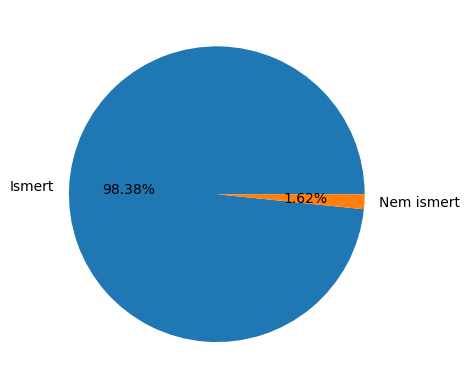

In [95]:
plt.pie([occurring_kanji_df['count'].sum(), missing_kanji_df['count'].sum()], labels=['Ismert', 'Nem ismert'], autopct='%.2f%%')

#### Az ETL2-ben megjelenő írásjelek hisztogramja Unicode-sorrendben a lexikális gyűjteménybeli előfordulásuk alapján

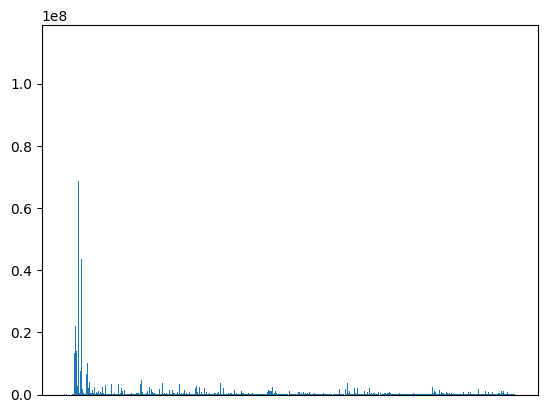

In [96]:
plt.bar(occurrences.keys(), occurrences.values(), width=1.25)
plt.xticks([])
plt.ylim([0, max(occurrences.values())])
plt.savefig("char_hist.svg")